In [1]:
import io, time, json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn
from tensorflow.keras.utils import to_categorical
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
# Grabbing the nominees
def retrieve_html(url):
    """
    Return the raw HTML at the specified URL.

    Args:
        url (string): 

    Returns:
        result: dict, movie name as key, movie information as value
    """
    # remember to use browser header here, or cannot retrieve full data from the website
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
    response = requests.get(url, headers = headers)
    html = response.content
    soup = BeautifulSoup(html,'lxml')

    result = {}
    for item in soup.find_all('div', {'class':'result-subgroup subgroup-awardcategory-chron'}):
        try:
            award_title = item.find('div',{'class':'result-subgroup-title'}).find('a',{'class':'nominations-link'}).contents[0]
            if award_title == 'ACTRESS IN A LEADING ROLE':
                sub_groups = item.find_all('div',{'class':'result-details awards-result-actingorsimilar'})
                for sub in sub_groups:
                    sub_result = {}
                    film_title = sub.find('div',{'class':'awards-result-film-title'}).find('a',{'class':'nominations-link'}).contents[0]
                    is_winner = 1
                    actor = sub.find('div',{'class':'awards-result-nominationstatement'}).find('a',{'class':'nominations-link'}).contents[0]           
                    character = sub.find('div',{'class':'awards-result-character-name'}).contents[0].strip('{}"')
                    sub_result['film_title'] = film_title
                    sub_result['is_winner'] = is_winner
                    sub_result['actor'] = actor
                    sub_result['character'] = character
                    # sub_result['director'] = director
                    result[film_title] = sub_result
        except Exception:
            pass
    return result

In [3]:
# data of year 2016
best_2016 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:89,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2017
best_2017 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:90,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

# data of year 2018
best_2018 = retrieve_html('http://awardsdatabase.oscars.org/Search/GetResults?query=%7B%22AwardShowFrom%22:91,%22Sort%22:%223-Award%20Category-Chron%22,%22Search%22:%22Basic%22%7D')

In [4]:
best_2016


{'Elle': {'film_title': 'Elle',
  'is_winner': 1,
  'actor': 'Isabelle Huppert',
  'character': 'Michèle'},
 'Loving': {'film_title': 'Loving',
  'is_winner': 1,
  'actor': 'Ruth Negga',
  'character': 'Mildred'},
 'Jackie': {'film_title': 'Jackie',
  'is_winner': 1,
  'actor': 'Natalie Portman',
  'character': 'Jackie Kennedy'},
 'La La Land': {'film_title': 'La La Land',
  'is_winner': 1,
  'actor': 'Emma Stone',
  'character': 'Mia'},
 'Florence Foster Jenkins': {'film_title': 'Florence Foster Jenkins',
  'is_winner': 1,
  'actor': 'Meryl Streep',
  'character': 'Florence Foster Jenkins'}}

In [5]:
# Load Data
import numpy as np
import pandas as pd
# read from award
df_awards = pd.read_csv('database.csv', skiprows = 1, names=['year','ceremony','award','winner','movieName','Nominis'])
df_movies = pd.read_csv('movies.csv')
df_credits = pd.read_csv('credits.csv')

In [6]:
#View data
#print(df_awards.head())
#print("")
#print(df_credits.head())

In [7]:
# append the data we scrapped to the df_awards
data = []
for k,v in best_2016.items():
    row = []
    row.append(['2016', 89, 'Best Actress', v['is_winner'], v['film_title'], v['actor']])
    data.append(row[0])
  
for k,v in best_2017.items():
    row = []
    row.append(['2017', 90, 'Best Actress', v['is_winner'], v['film_title'], v['actor']])
    data.append(row[0])

for k,v in best_2018.items():
    row = []
    row.append(['2018', 91, 'Best Actress', v['is_winner'], v['film_title'], v['actor']])
    data.append(row[0])
# pass the column name to the columns!!! Or there will be a runtime error
df_awards=df_awards.append(pd.DataFrame(data,columns=['year','ceremony','award','winner','movieName','Nominis']),ignore_index=True)

df_awards

,year,ceremony,award,winner,movieName,Nominis
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
5,1927/1928,1,Art Direction,NaN,Rochus Gliese,Sunrise
6,1927/1928,1,Art Direction,1.0,William Cameron Menzies,The Dove; Tempest
7,1927/1928,1,Art Direction,NaN,Harry Oliver,7th Heaven
8,1927/1928,1,Cinematography,NaN,George Barnes,The Devil Dancer; The Magic Flame; Sadie Thompson
9,1927/1928,1,Cinematography,1.0,Charles Rosher,Sunrise


In [8]:
# Data Manipulation
#Joining the dataframes
if 'title' in df_credits.columns: 
  df_credits = df_credits.drop('title',axis=1) 
df_credits_movies = df_credits.set_index('movie_id').join(df_movies.set_index('id'))

In [9]:
#df_credits_movies.dtypes
# Reset the data types and get the earliest date of release_date
df_credits_movies['release_date'] = pd.to_datetime(df_credits_movies['release_date'])
#get the earliest release date from the dataset
min_year = min(df_credits_movies['release_date']) #1916-09-04
max_year = max(df_credits_movies['release_date']) #2017-02-03

In [10]:
# Select movies that are in Outstanding Picture or Best Picture awards category -> df_picture_awards
#join df_credits_movies and df_awards by movie name (df_credits_movies.title = df_awards.movieName)
#before that, extract BEST PICTRUE from the df_awards
df_actress_awards = df_awards.loc[df_awards['award'].isin(['Best Actress'])]
df_actress_awards.reset_index(drop = True, inplace = True)
df_credits_movies = df_credits_movies.loc[df_credits_movies['status'].isin(['Released'])]
df_actress_awards
df_credits_movies

,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
movie_id,,,,,,,,,,,,,,,,,,,,,
19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
559,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
38757,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de...",260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,"[{""id"": 1562, ""n

In [11]:
# Replace all the null value in ‘winner’ column with 1
# df_picture_awards['winner'].isnull().sum()
df_actress_awards['winner'].fillna(1,inplace = True)
df_actress_awards

,year,ceremony,award,winner,movieName,Nominis
0,2016,89,Best Actress,1.0,Elle,Isabelle Huppert
1,2016,89,Best Actress,1.0,Loving,Ruth Negga
2,2016,89,Best Actress,1.0,Jackie,Natalie Portman
3,2016,89,Best Actress,1.0,La La Land,Emma Stone
4,2016,89,Best Actress,1.0,Florence Foster Jenkins,Meryl Streep
5,2017,90,Best Actress,1.0,The Shape of Water,Sally Hawkins
6,2017,90,Best Actress,1.0,"Three Billboards outside Ebbing, Missouri",Frances McDormand
7,2017,90,Best Actress,1.0,"I, Tonya",Margot Robbie
8,2017,90,Best Actress,1.0,Lady Bird,Saoirse Ronan
9,2017,90,Best Actress,1.0,The Post,Meryl Streep


In [12]:
# join df_picture_awards with df_credits_movies
#cleaning names/punctuation
import re
Actress = [re.sub(r'[^\w\s]','',x) for x in df_actress_awards['Nominis'].str.lower().str.strip().values]
df_actress_awards.loc[:,'Actress'] = Actress
df_credits_movies['Actress'] = df_credits_movies.cast.str.extract('({})'.format('|'.join(df_actress_awards['Nominis'])), expand=False)
df_credits_movies['Actress'] = df_credits_movies['Actress'].str.lower()
#df_credits_movies = df_credits_movies[df_credits_movies['Actress'].notnull()]
# for Actr in Actress:
#     #df_credits_movies["B"][df_credits_movies['A'].str.contains("BULL")] = "Long"
# #     df_credits_movies["Actress"][df_credits_movies['cast'].str.contains(Actr)] = Actr
# #     print(df_credits_movies['Actress'])
#     df_credits_movies["Actress"] = ifelse(grepl(Actr, df_credits_movies['cast'], ignore.case = T), Actr, "Other")

#print(filtered_df)
# check the dataframe, we can see the string in movie_title now is valid
print(df_actress_awards)
# print(df_credits_movies['Actress'])

    year  ceremony         award  winner  \
0   2016        89  Best Actress     1.0   
1   2016        89  Best Actress     1.0   
2   2016        89  Best Actress     1.0   
3   2016        89  Best Actress     1.0   
4   2016        89  Best Actress     1.0   
5   2017        90  Best Actress     1.0   
6   2017        90  Best Actress     1.0   
7   2017        90  Best Actress     1.0   
8   2017        90  Best Actress     1.0   
9   2017        90  Best Actress     1.0   
10  2018        91  Best Actress     1.0   
11  2018        91  Best Actress     1.0   
12  2018        91  Best Actress     1.0   
13  2018        91  Best Actress     1.0   
14  2018        91  Best Actress     1.0   

                                    movieName            Nominis  \
0                                        Elle   Isabelle Huppert   
1                                      Loving         Ruth Negga   
2                                      Jackie    Natalie Portman   
3                      

In [13]:
# join the two tables, merge the data
df = df_actress_awards.merge(df_credits_movies, left_on='Actress', right_on='Actress', how='right')
df = df.reset_index(drop=True)
#drop the columns from award table
df.drop('homepage',axis = 1, inplace = True)
df.drop('year',axis = 1, inplace = True)
df.drop('award',axis = 1, inplace = True)
df.drop('movieName',axis = 1, inplace = True)
df.drop('Nominis',axis = 1, inplace = True)
df.drop('ceremony',axis = 1, inplace = True)
df['winner'].fillna(0,inplace=True) #fill NA with 0
df
# Print master df to csv
df.to_csv('masterList.csv', index=False)

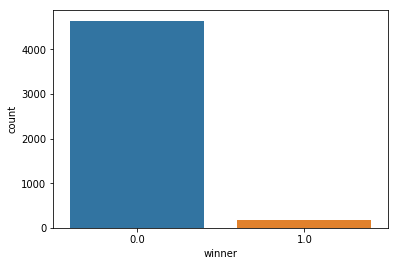

In [14]:
# We will choose the under-sampling by sampling from the 0-labeled data. 
# We need to first get a subset of nominated data, then sample from the non-nominated data, 
# and finally append the sampled data to the subset of nominated data.
sns.countplot(x='winner', data = df)


In [15]:
#Get the number of 0 labeled data, and the number of 1 labeled data
print(len(df.loc[df['winner'] == 0])) #4586
print(len(df.loc[df['winner'] == 1])) #209

4643
182


In [16]:
#balance the data
df_subset_0 = df.loc[df['winner'] == 0]
df_subset_1 = df.loc[df['winner'] == 1]

df_subset_0.drop('winner',axis=1,inplace=True)
df_subset_1.drop('winner',axis=1,inplace=True)

#sample with replacement
df_subset_0 = df_subset_0.sample(400) 
df_subset = pd.concat([df_subset_0,df_subset_1],ignore_index = True)
df_new = df_subset.merge(df_actress_awards, left_on = 'Actress', right_on = 'Actress', how = 'left')
df_new = df_new.fillna(0)

In [17]:
print(len(df_new))

642


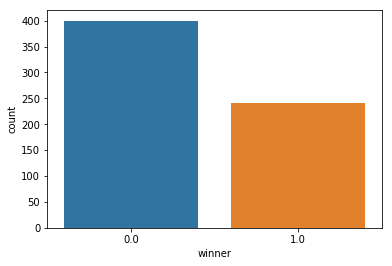

In [18]:
sns.countplot(x='winner', data = df_new)

In [19]:
#check number of null values in the dataset
df_new.isnull().sum()

Actress                 0
cast                    0
crew                    0
budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
year                    0
ceremony                0
award                   0
winner                  0
movieName               0
Nominis                 0
dtype: int64

In [20]:
#Exploratory Data Analysis

# check the data types and select numeric variables
df_new.dtypes

Actress                         object
cast                            object
crew                            object
budget                           int64
genres                          object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
year                            object
ceremony                       float64
award                           object
winner                         float64
movieName                

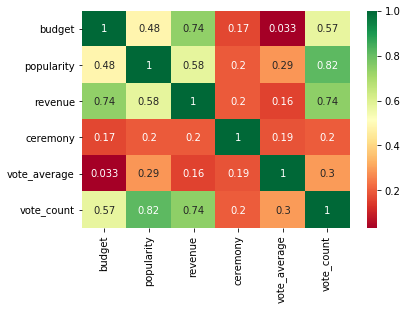

In [21]:
# correlation analysis
g = sns.heatmap(df_new[['budget','popularity','revenue','ceremony','vote_average','vote_count']].corr(),cmap='RdYlGn',annot=True)





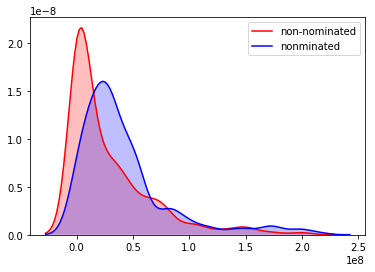

In [22]:
# Density Curve
# budget
budget0 = df_new[df_new['winner'] == 0]['budget']
budget1 = df_new[df_new['winner'] == 1]['budget']

g = sns.kdeplot(budget0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(budget1, legend = True, shade=True, color='b', label = 'nonminated')

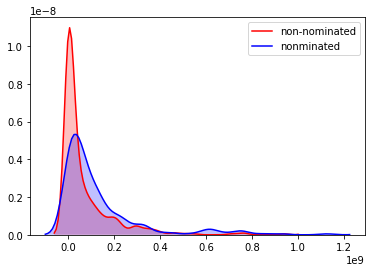

In [23]:
# revenue
# density curve
revenue0 = df_new[df_new['winner'] == 0]['revenue']
revenue1 = df_new[df_new['winner'] == 1]['revenue']

g = sns.kdeplot(revenue0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(revenue1, legend = True, shade=True, color='b', label = 'nonminated')

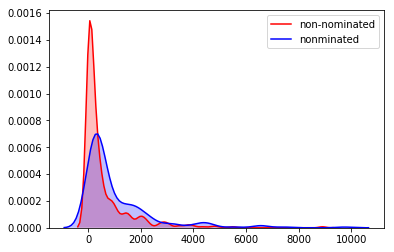

In [24]:
# vote count
vc0 = df_new[df_new['winner'] == 0]['vote_count']
vc1 = df_new[df_new['winner'] == 1]['vote_count']

g = sns.kdeplot(vc0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(vc1, legend = True, shade=True, color='b', label = 'nonminated')

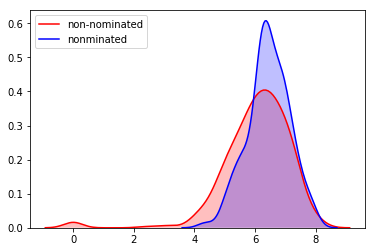

In [25]:
# vote average
va0 = df_new[df_new['winner'] == 0]['vote_average']
va1 = df_new[df_new['winner'] == 1]['vote_average']

g = sns.kdeplot(va0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(va1, legend = True, shade=True, color='b', label = 'nonminated')

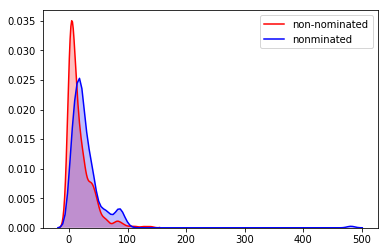

In [26]:
# popularity
popularity0 = df_new[df_new['winner'] == 0]['popularity']
popularity1 = df_new[df_new['winner'] == 1]['popularity']

g = sns.kdeplot(popularity0, legend = True, shade=True, color='r',label = 'non-nominated')
g = sns.kdeplot(popularity1, legend = True, shade=True, color='b', label = 'nonminated')

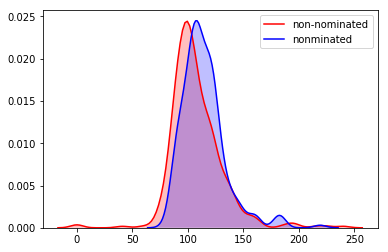

In [27]:
#runtime
runtime0 = df_new[df_new['winner'] == 0]['runtime']
runtime1 = df_new[df_new['winner'] == 1]['runtime']

g = sns.kdeplot(runtime0, legend = True, shade=True, color='r', label = 'non-nominated')
g = sns.kdeplot(runtime1, legend = True, shade=True, color='b', label = 'nonminated')

In [28]:
#genres
#clean the data
genres_name0 = {}
genres_name1 = {}
genres_set = set()
for i in range(len(df_new)):
    genres = json.loads(df_new.loc[i,'genres'])
    for it in genres:
        genres_set.add(it['name'])
        if df_new.loc[i,'winner'] == 0:
            if it['name'] not in genres_name0:
                genres_name0[it['name']] = 1
            else:
                genres_name0[it['name']] += 1
        if df_new.loc[i,'winner'] == 1:
            if it['name'] not in genres_name1:
                genres_name1[it['name']] = 1
            else:
                genres_name1[it['name']] += 1

genres_array0=[]
genres_array1=[]
for g in genres_set:
    if g in genres_name0:
        genres_array0.append(genres_name0[g])
    else:
        genres_array0.append(0)
    if g in genres_name1:
        genres_array1.append(genres_name1[g])
    else:
        genres_array1.append(0)


        
genres_all = []
genres_all.append(np.array(genres_array0)/sum(genres_array0))
genres_all.append(np.array(genres_array1)/sum(genres_array1))

In [29]:
df_genres = pd.DataFrame(genres_all, columns=list(genres_set))
print(df_genres.head())

      Drama  Animation  Thriller  Documentary  Science Fiction       War  \
0  0.183450   0.023928  0.105683      0.00997         0.038883  0.015952   
1  0.244932   0.021959  0.052365      0.00000         0.035473  0.008446   

     Action   Mystery   Foreign   Western  Adventure   History     Crime  \
0  0.093719  0.027916  0.003988  0.004985   0.056830  0.011964  0.050847   
1  0.065878  0.021959  0.000000  0.010135   0.069257  0.016892  0.047297   

      Music    Comedy    Horror   Romance    Family   Fantasy  
0  0.011964  0.151545  0.048853  0.079761  0.046859  0.032901  
1  0.020270  0.199324  0.005068  0.103041  0.033784  0.043919  


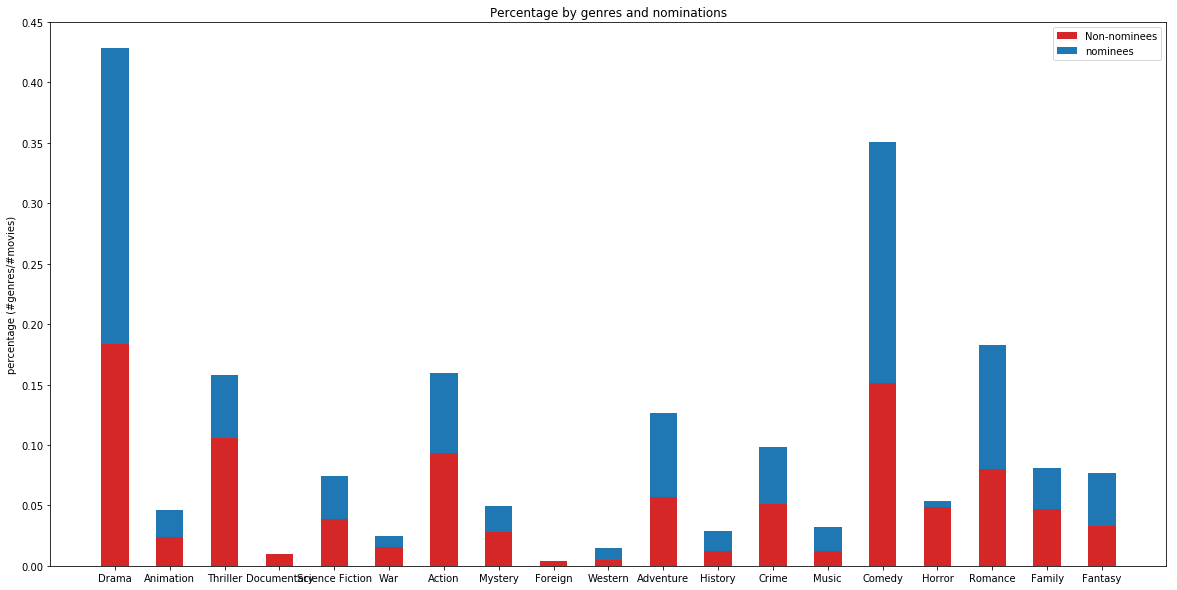

In [30]:
# draw stacked bar chart
N = len(df_genres.columns)
ind = np.arange(N)
width = 0.5

plt.figure(figsize=(20,10))
p1 = plt.bar(ind, df_genres.loc[[0]].values[0], width, color='#d62728')
p2 = plt.bar(ind, df_genres.loc[[1]].values[0], width, bottom=df_genres.loc[[0]].values[0])

plt.ylabel('percentage (#genres/#movies)')
plt.title('Percentage by genres and nominations')
plt.xticks(ind,df_genres.columns)
plt.legend((p1[0],p2[0]),('Non-nominees','nominees'))

In [31]:
# Feature Engineering
# Since many columns such as “crew”, “cast” contain information in json format, we need to extract useful information from the columns and then perform one hot encoding.
# We will transform our dataset into a all numeric matrix so that we can feed the data into our machine learning model.
# To look at the structure of column (eg.”cast”), we can use: df.loc[0,’cast’]
import json
def feature_engineering(column_name, df, json_name):
    """
    Args:
        column_name: the column name in the dataframe that contains a json file that needs to conduct feature engineering on
        df: dataframe that perform feature engineering on
        json_name: name in the json file that we want to extract
    
    Returns: new dataframe after feature engineering
    """
    
    name = {}

    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] not in name:
                name[it[json_name]] = 1
            else:
                name[it[json_name]] += 1
    
    final = {}
    index = 0
    for k,v in name.items():
        if v > 1:
            final[k] = index
            index += 1
    np_item = np.zeros((len(df),len(final)))
    item_dict = {}
    row = 0
    for item in df[column_name]:
        group = json.loads(item)
        for it in group:
            if it[json_name] in final:
                index = final[it[json_name]]
                np_item[row][index] = 1
        row += 1

    df_item = pd.DataFrame(np_item, columns = list(final.keys()))
    df_output = pd.concat([df,df_item],axis = 1)
    
    return df_output

In [32]:
df2 = feature_engineering("cast", df_new, "name")
df2 = df2.drop('cast', axis = 1) #drop the column after feature engineering
df2

,Actress,crew,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,...,Jamie Denbo,Tom Yi,Chaunty Spillane,Gary Weeks,Steve Mallory,Steve Little,Ben Falcone,Ellie Kemper,Annie Mumolo,Mia Rose Frampton
0,0,"[{""credit_id"": ""52fe433f9251416c75009101"", ""de...",165000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 12, ""nam...","[{""id"": 189111, ""name"": ""ogre""}, {""id"": 209714...",en,Shrek Forever After,A bored and domesticated Shrek pacts with deal...,44.041186,"[{""name"": ""DreamWorks Animation"", ""id"": 521}]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,"[{""credit_id"": ""5636292d9251416d5200c6ec"", ""de...",25000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...","[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,The Adventurer: The Curse of the Midas Box,17-year-old Mariah Mundi's life is turned upsi...,8.842722,"[{""name"": ""Matador Pictures"", ""id"": 707}, {""na...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,"[{""credit_id"": ""52fe43c4c3a36847f806e0c3"", ""de...",0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...","[{""id"": 242, ""name"": ""new york""}, {""id"": 334, ...",en,My Super Ex-Girlfriend,When New York architect Matt Saunders dumps hi...,20.252143,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,"[{""credit_id"": ""52fe424cc3a36847f80134e7"", ""de...",3000000,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 30, ""name"": ""individual""}, {""id"": 526,...",en,One Flew Over the Cuckoo's Nest,While serving time for insanity at a state men...,127.525581,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,"[{""credit_id"": ""5715157dc3a3684122010c0c"", ""de...",15000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 487, ""name"": ""cairo""}, {""id"": 1975, ""n...",en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,41.286336,"[{""name"": ""Horizon Pictures (II)"", ""id"": 11356}]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,"[{""credit_id"": ""5677d85ec3a368168e009124"", ""de...",35000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...","[{""id"": 1228, ""name"": ""1970s""}, {""id"": 1418, ""...",en,The Walk,The story of French high-wire artist Philippe ...,37.335721,"[{""name"": ""TriStar Pictures"", ""id"": 559}, {""na...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,"[{""credit_id"": ""5917fdd4925141583c03ff4b"", ""de...",1000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...","[{""id"": 390, ""name"": ""skateboarding""}, {""id"": ...",en,Hardflip,Hardflip follows the story of Caleb (Randy Way...,0.341461,[],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,"[{""credit_id"": ""52fe4623c3a368484e080dc7"", ""de...",0,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 566, ""name"": ""sexual identity""}, {""id""...",fa,Circumstance,A wealthy Iranian family struggles to contain ...,2.342390,"[{""name"": ""A Space Between"", ""id"": 16144}, {""n...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,"[{""credit_id"": ""554ccb6dc3a3685e4c0053bf"", ""de...",4000000,"[{""id"": 27, ""name"": ""Horror""}]","[{""id"": 4458, ""name"": ""post-apocalyptic""}, {""i...",en,Maggie,There's a deadly zombie epidemic threatening h...,40.016306,"[{""name"": ""Lionsgate"", ""id"": 1632}, {""name"": ""...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,"[{""credit_id"": ""52fe4c93c3a36847f8234cff"", ""de...",4500000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...","[{""id"": 616, ""name"": ""witch""}, {""id"": 10776, ""...",en,Hansel and Gretel Get Baked,An intense new marijuana strain named “Black F...,2.503612,"[{""name"": ""Tribeca Productions"", ""id"": 11391}]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# director
cast_name = {}

for item in df2['Actress']:
    if item not in cast_name:
        cast_name[item] = 1
    else:
        cast_name[item]+=1


# set the appear tims for actors
final_crew = {}
index = 0
for k,v in cast_name.items():
    if v > 0:
        final_crew[k] = index
        index += 1
# print(len(final_crew))

np_crew = np.zeros((len(df2), len(final_crew)))
row = 0
for item in df2['Actress']:
    if item not in final_crew:
        index = final_crew[item]
        np_crew[row][index] = 1
    else:
        cast_name[item]+=1
    row += 1

df_crew = pd.DataFrame(np_crew, columns = list(final_crew.keys()))
            
df3 = pd.concat([df2, df_crew], axis = 1)
# print(df.shape)

In [34]:
# df_clean = df3
df3=df3.drop(['crew'],axis=1)
genres
df4 = feature_engineering("genres", df3, "name")
df4 = df4.drop(['genres'], axis = 1)
#keywords
df5 = feature_engineering('keywords', df4, 'name')
df5 = df5.drop(['keywords'], axis = 1)
#production_companies
df6 = feature_engineering('production_companies',df5,'name')
df6 = df6.drop(['production_companies'],axis=1)
#production_countries
df7 = feature_engineering('production_countries',df6,'name')
df7 = df7.drop(['production_countries'],axis=1)
#spoken_languages
df8 = feature_engineering('spoken_languages',df7,'iso_639_1')
df8 = df8.drop(['spoken_languages'],axis=1)

# # drop the columns not used
# df8
#df_clean = df8.drop(["movie_title","original_title","overview","tagline",'title','original_language','status','release_date','movieName','filmInfo','award'],axis=1)

In [35]:
list(df8)

['Actress',
 'budget',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'year',
 'ceremony',
 'award',
 'winner',
 'movieName',
 'Nominis',
 'Eddie Murphy',
 'Cameron Diaz',
 'Antonio Banderas',
 'Julie Andrews',
 'Jon Hamm',
 'John Cleese',
 'Craig Robinson',
 'Jane Lynch',
 'Lake Bell',
 'Mary Kay Place',
 'Kristen Schaal',
 'Cody Cameron',
 'Larry King',
 'Christopher Knights',
 'Conrad Vernon',
 'Chris Miller',
 'Ashley Boettcher',
 'Frank Welker',
 'Michael Sheen',
 'Sam Neill',
 'Ioan Gruffudd',
 'Keeley Hawes',
 'Mella Carron',
 'Tim Ajro',
 'Antony Gabriel',
 'Uma Thurman',
 'Luke Wilson',
 'Anna Faris',
 'Eddie Izzard',
 'Rainn Wilson',
 'Catherine Reitman',
 'Jack Nicholson',
 'Louise Fletcher',
 'Danny DeVito',
 'Brad Dourif',
 'Christopher Lloyd',
 'Vincent Schiavelli',
 'Aurore Clément',
 'Anjelica Huston',
 "Peter O'Toole",
 'Alec Guinness',
 'Ant

In [41]:
#'Actress', 'budget', 'original_language', 'popularity', 'release_date', 'revenue', 'vote_average', 'vote_count', 'year', 'winner', 'movieName', 
df_clean = df8.drop([
    'Actress',
    'original_language',
    'release_date',
    'movieName',
 'original_title',
    'status',
 'tagline',
 'title',
 'overview',
 'runtime',
 'ceremony',
 'award','Nominis'],axis=1)

df_clean.head()

,budget,popularity,revenue,vote_average,vote_count,year,winner,Eddie Murphy,Cameron Diaz,Antonio Banderas,...,la,cn,th,el,fi,sq,vi,sw,ro,no
0,165000000,44.041186,752600867,6.0,1959,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25000000,8.842722,6399,5.1,73,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,20.252143,60896147,4.8,442,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3000000,127.525581,108981275,8.2,2919,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15000000,41.286336,69995385,7.8,851,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(df_clean['winner'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
612    1.0
613    1.0
614    1.0
615    1.0
616    1.0
617    1.0
618    1.0
619    1.0
620    1.0
621    1.0
622    1.0
623    1.0
624    1.0
625    1.0
626    1.0
627    1.0
628    1.0
629    1.0
630    1.0
631    1.0
632    1.0
633    1.0
634    1.0
635    1.0
636    1.0
637    1.0
638    1.0
639    1.0
640    1.0
641    1.0
Name: winner, Length: 642, dtype: float64


In [43]:
# Model Training
# split
X = df_clean[df_clean.columns.difference(['winner'])]
print(list(df_clean))

#X = StandardScaler().fit_transform(X)
y = df_clean['winner']
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=1/7.0, random_state=0)
print(X_train)

['budget', 'popularity', 'revenue', 'vote_average', 'vote_count', 'year', 'winner', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas', 'Julie Andrews', 'Jon Hamm', 'John Cleese', 'Craig Robinson', 'Jane Lynch', 'Lake Bell', 'Mary Kay Place', 'Kristen Schaal', 'Cody Cameron', 'Larry King', 'Christopher Knights', 'Conrad Vernon', 'Chris Miller', 'Ashley Boettcher', 'Frank Welker', 'Michael Sheen', 'Sam Neill', 'Ioan Gruffudd', 'Keeley Hawes', 'Mella Carron', 'Tim Ajro', 'Antony Gabriel', 'Uma Thurman', 'Luke Wilson', 'Anna Faris', 'Eddie Izzard', 'Rainn Wilson', 'Catherine Reitman', 'Jack Nicholson', 'Louise Fletcher', 'Danny DeVito', 'Brad Dourif', 'Christopher Lloyd', 'Vincent Schiavelli', 'Aurore Clément', 'Anjelica Huston', "Peter O'Toole", 'Alec Guinness', 'Anthony Quinn', 'Omar Sharif', 'Robert Rietty', 'George Plimpton', 'John Robinson', 'Joseph Gordon-Levitt', 'Ben Kingsley', 'Ben Schwartz', 'James Badge Dale', 'Jason Blicker', 'Philippe Hartmann', 'Jason Deline', 'Chris Cavener

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
fit = pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# X_test = pca.transform(X_test)
# pca = PCA(n_components = 3)
# fit = pca.fit_transform(X)
# fit2 = pca.fit(X)
# print("Explained Variance: %s" % pca.explained_variance_ratio_) 
# print(fit)

In [46]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# For small datasets, ‘liblinear’ is a good choice
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
# Predict for One Observation
predicted = logisticRegr.predict(X_test)
print(logisticRegr.predict(X_test))
# print(y_test)
# df8['movie_title'][y_test.index]

[1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]


In [48]:
logisticRegr.score(X_train, y_train)

1.0

In [49]:
logisticRegr.score(X_test, y_test) # 0.8850574712643678

0.8695652173913043

In [50]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
sensitivity = tp/(tp+fn)
print(sensitivity) # 0.84375

0.7692307692307693


In [53]:
# Improvement: Cross Validation
# 3-fold Cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
sumAccuracy = []
for train,test in skf.split(X,y):
#     logisticRegr.fit(df_clean.iloc[train][], )
    df_train = df_clean.iloc[train]
    df_test = df_clean.iloc[test]
    train_X = df_train[df_clean.columns.difference(['winner'])]
    train_y = df_train['winner']
    test_X = df_test[df_clean.columns.difference(['winner'])]
    test_y = df_test['winner']
    logisticRegr.fit(train_X, train_y)
    sumAccuracy.append(logisticRegr.score(test_X, test_y))
avg = np.mean(sumAccuracy)
print(avg) # 0.7803837953091683
#     print(df_clean.iloc[train,df_clean.columns.difference(['winner'])])

0.8597830845101034
